# TWAS prototypes

Here we analyze an example data-set for *CLU* eQTL in Inhibatory Neurons and AD GWAS from Bellenguez 2022. Data is received from Chunming Liu at Clemson University for the multi-tissue TWAS companion paper.

## Load data

In [1]:
gwas = readRDS("CLU_gwas.rds")
eqtl = readRDS("pseudo_bulk_CLU.ENSG00000120885.rds")

In [2]:
head(gwas)

,key,CHR,POS,A1,A2,beta,standard_error,SNP,Z
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
5506389,8:27119788,8,27119788,T,C,-0.0089,0.0111,chr8:27119788:C:T,-0.8018018
5506390,8:27119867,8,27119867,T,G,-0.0089,0.0111,chr8:27119867:G:T,-0.8018018
5506391,8:27119961,8,27119961,T,G,0.0236,0.0083,chr8:27119961:T:G,2.8433735
5506392,8:27120053,8,27120053,T,C,-0.0217,0.0246,chr8:27120053:C:T,-0.8821138
5506393,8:27120593,8,27120593,A,G,-0.0232,0.0246,chr8:27120593:G:A,-0.9430894
5506394,8:27120636,8,27120636,T,C,0.0045,0.0141,chr8:27120636:C:T,0.3191489


In [3]:
names(eqtl)

[1] "X"     "y_res"

In [4]:
head(eqtl$X)

,chr8:27119788_C_T,chr8:27119867_G_T,chr8:27119961_G_T,chr8:27120053_C_T,chr8:27120593_G_A,chr8:27120636_C_T,chr8:27120932_A_G,chr8:27120975_G_A,chr8:27121290_T_C,chr8:27121498_C_A,⋯,chr8:28108194_A_C,chr8:28108723_T_C,chr8:28109257_G_A,chr8:28109506_A_G,chr8:28109848_G_A,chr8:28110339_A_G,chr8:28112230_C_T,chr8:28112288_A_G,chr8:28113443_G_T,chr8:28114493_A_C
MAP15387421:MAP15387421,0,0,0,0,0,1,0,1,1,1,⋯,1,1,0,0,1,1,0,1,0,0
MAP22868024:MAP22868024,0,0,1,0,0,0,0,0,0,0,⋯,0,1,0,0,1,1,0,0,1,0
MAP46246604:MAP46246604,1,1,0,0,0,0,0,0,1,1,⋯,1,1,0,0,1,1,0,1,0,0
MAP50104134:MAP50104134,1,1,1,0,0,0,0,0,1,1,⋯,0,1,0,0,1,1,0,1,0,0
MAP50104846:MAP50104846,1,1,1,0,0,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
MAP50106442:MAP50106442,1,1,1,0,0,0,1,0,1,1,⋯,1,1,0,0,1,1,0,1,0,0


In [5]:
head(eqtl$y_res)

MAP15387421:MAP15387421 MAP22868024:MAP22868024 MAP46246604:MAP46246604 
             0.50197972              0.24567929             -0.06281688 
MAP50104134:MAP50104134 MAP50104846:MAP50104846 MAP50106442:MAP50106442 
            -0.53649517             -0.56143407             -0.54624170

In [6]:
dim(eqtl$X)

[1]  415 2828

## Fine-mapping using SuSiE

In FunGen-xQTL we have a [simple pipeline](https://github.com/cumc/xqtl-pipeline/blob/main/code/fine_mapping/SuSiE/SuSiE.ipynb) for this.

In [7]:
library(susieR)
library(tidyverse)
get_cs_index <- function(snps_idx, fitted_data) {
    idx <- tryCatch(
        which(
            pmap(list(a = fitted_data$sets$cs), function(a) snps_idx %in% a) %>% unlist()
        ),
        error = function(e) NA_integer_
    )
    if(length(idx) == 0) return(NA_integer_)
    return(idx)
}
signal_cutoff = 0.1
coverage = 0.7
susie_res <- susie(eqtl$X, eqtl$y_res, 
                 L=20,
                 max_iter=500,
                 estimate_residual_variance=TRUE,
                 estimate_prior_variance=TRUE,
                 refine=TRUE,
                 compute_univariate_zscore=FALSE,
                 coverage=coverage)

Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.3     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.0.2
✔ tidyr   1.0.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
secondary_coverage = 0.2
susie_res$sets_secondary = susie_get_cs(susie_res, eqtl$X, coverage=secondary_coverage)

In [9]:
compute_maf <- function(geno){
  f <- mean(geno,na.rm = TRUE)/2
  return(min(f, 1-f))
}
variants_index = c(which(susie_res$pip >= signal_cutoff), unlist(susie_res$sets$cs)) %>% unique %>% sort
maf = apply(eqtl$X, 2, compute_maf)[variants_index]
all_variants = gsub("_",":",names(susie_res$pip))
variants = gsub("_",":",names(susie_res$pip)[variants_index])
pip = susie_res$pip[variants_index]
cs_info = map_int(variants_index, ~get_cs_index(.x, susie_res))
cs_index = ifelse(is.na(cs_info), 0, str_replace(names(susie_res$sets$cs)[cs_info], "L", "") %>% as.numeric)
univariate_res = univariate_regression(eqtl$X[, variants_index, drop=F], eqtl$y_res)
# here betahat and sebetahat were computed from standardized X and Y
susie_res$top_loci = cbind(variants, maf, univariate_res$betahat, univariate_res$sebetahat, pip, cs_index)
colnames(susie_res$top_loci) = c("variant_id", "maf", "bhat", "sbhat", "pip", "cs_index_primary")#, "cs_index_secondary")
rownames(susie_res$top_loci) = NULL

In [10]:
susie_res$top_loci # to test you can set it to 1) 0.1 and 0.95 vs 2) 0.1 and 0.2
# parameter: default_coverage = 0.95
# parameter: secondary_coverage = 0.7
# parameter: signal_cutoff = 0.1

variant_id,maf,bhat,sbhat,pip,cs_index_primary
chr8:27596246:C:T,0.278313253012048,-0.122514739342209,0.0249868671221125,0.144496973204548,0
chr8:27724254:C:T,0.472289156626506,0.146350893456887,0.0235695850612729,0.044266347614216,1
chr8:27724508:A:C,0.472289156626506,0.146350893456887,0.0235695850612729,0.044266347614216,1
chr8:27728910:A:G,0.469879518072289,0.146101325781137,0.0235890553342029,0.03949625295586,1
chr8:27729588:C:T,0.471084337349398,0.145082188952344,0.0235285991106962,0.0345101547656025,1
chr8:27732510:A:G,0.472289156626506,0.147441999306526,0.0234182228577676,0.0684513651185077,1
chr8:27734332:G:A,0.497590361445783,0.14373324203229,0.0230653145891427,0.0663490510604041,1
chr8:27737583:T:C,0.496385542168675,0.142163759153291,0.0231535224323869,0.0411110622607239,1
chr8:27737848:G:A,0.497590361445783,0.14373324203229,0.0230653145891427,0.0663490510604041,1
chr8:27740783:C:T,0.497590361445783,0.14373324203229,0.0230653145891427,0.0663490510604043,1


In [11]:
pnorm(-0.122514739342209/0.0249868671221125)

[1] 4.715229e-07

PIP of the two SNPs of interest are:

In [12]:
susie_res$pip["chr8:27608798_C_T"]

chr8:27608798_C_T 
       0.00602148

In [13]:
susie_res$pip["chr8:27637095_G_A"]

chr8:27637095_G_A 
     0.0004595214

## TWAS

Use SuSiE,

In [14]:
R = cor(eqtl$X)

In [41]:
devtools::load_all("~/GIT/software/pecotmr")

Loading pecotmr



In [16]:
weights = susie_weights(susie_res)

In [17]:
twas_z(weights, gwas$Z, R=R)

-3.07806
0.002083527


In [18]:
cor(eqtl$X%*%weights, eqtl$y_res)^2

0.1220979


Now select only the top loci,

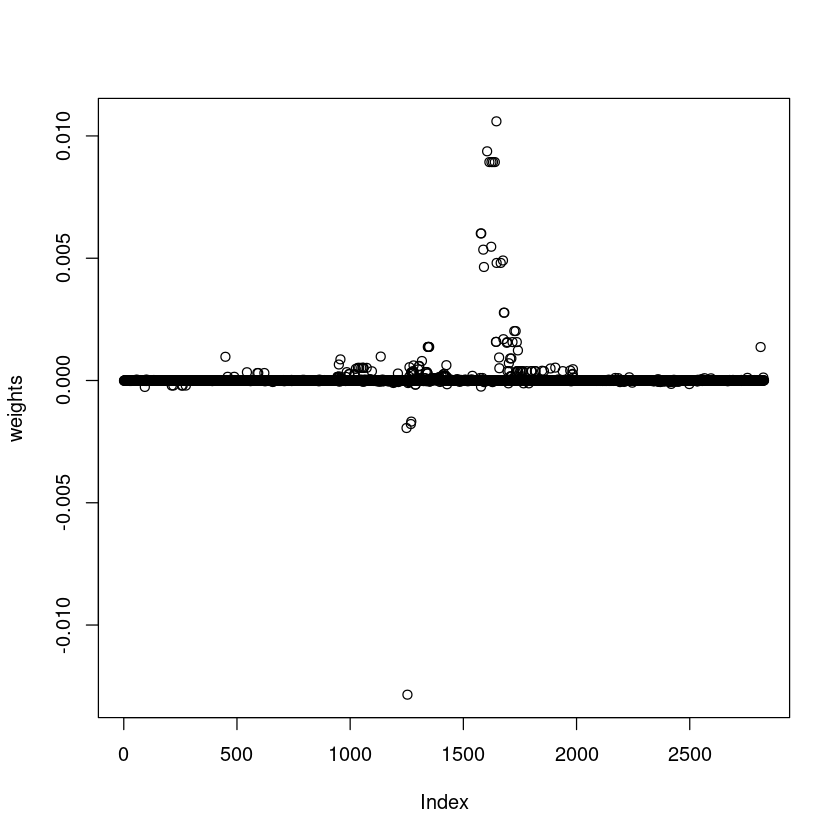

In [19]:
plot(weights)

In [20]:
weights[!all_variants %in% susie_res$top_loci[,1]] = 0

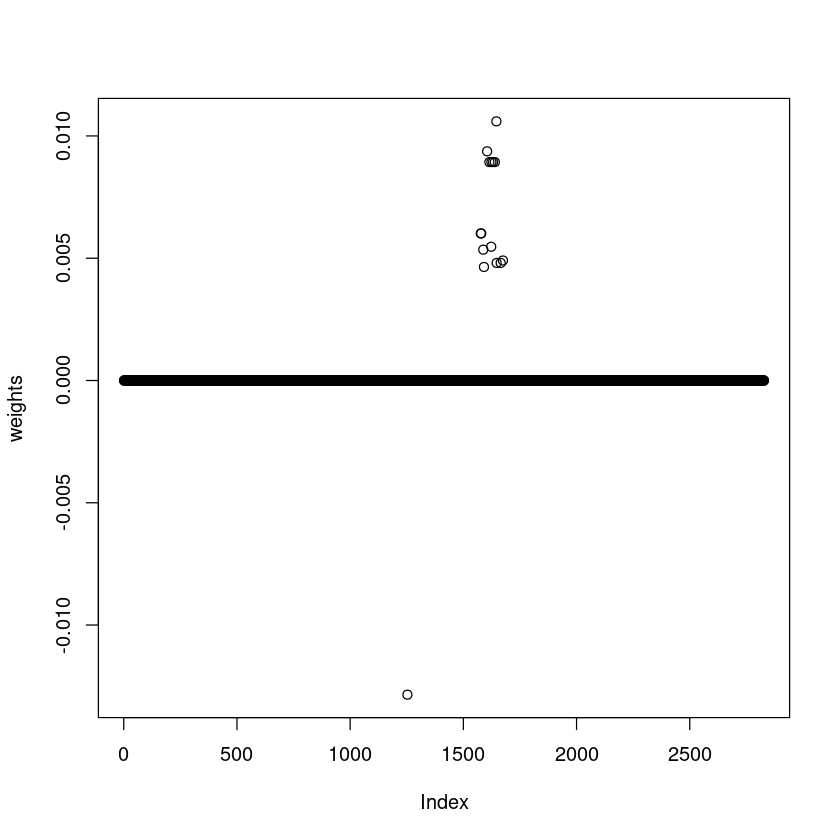

In [21]:
plot(weights)

In [22]:
twas_z(weights, gwas$Z, R=R)

-2.438249
0.01475859


Use elastic net

In [23]:
weights = glmnet_weights(eqtl$X, eqtl$y_res)
cor(eqtl$X%*%weights, eqtl$y_res)^2
twas_z(weights, gwas$Z, R=R)

0.1612689


-4.259195
2.05164e-05


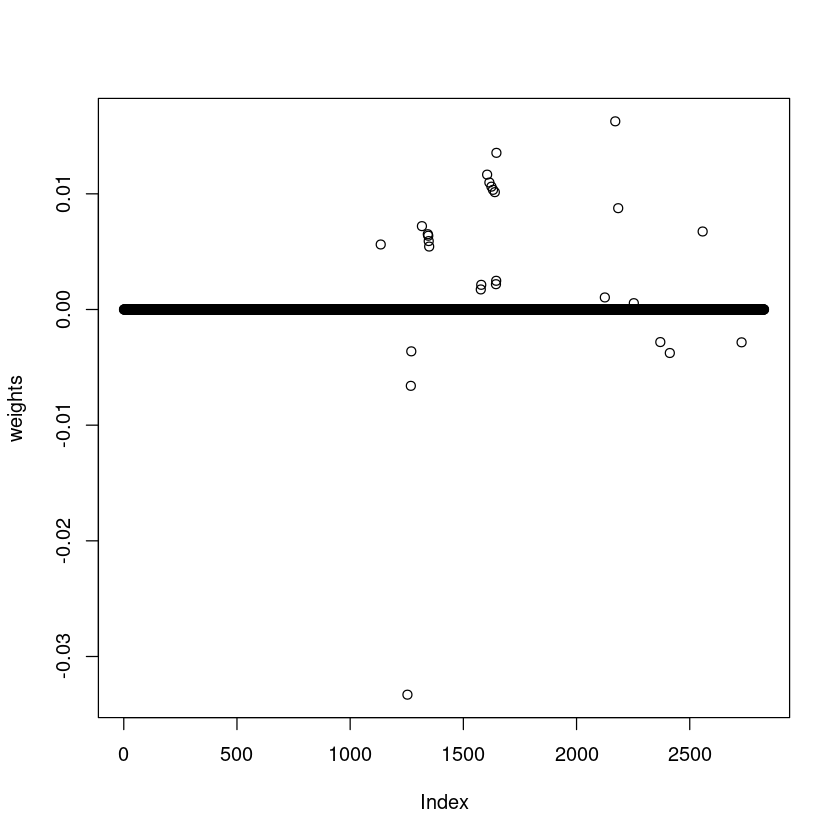

In [24]:
plot(weights)

Use LASSO,

In [25]:
weights = glmnet_weights(eqtl$X, eqtl$y_res,alpha=1)
cor(eqtl$X%*%weights, eqtl$y_res)^2
twas_z(weights, gwas$Z, R=R)

0.2566184


-4.432258
9.325124e-06


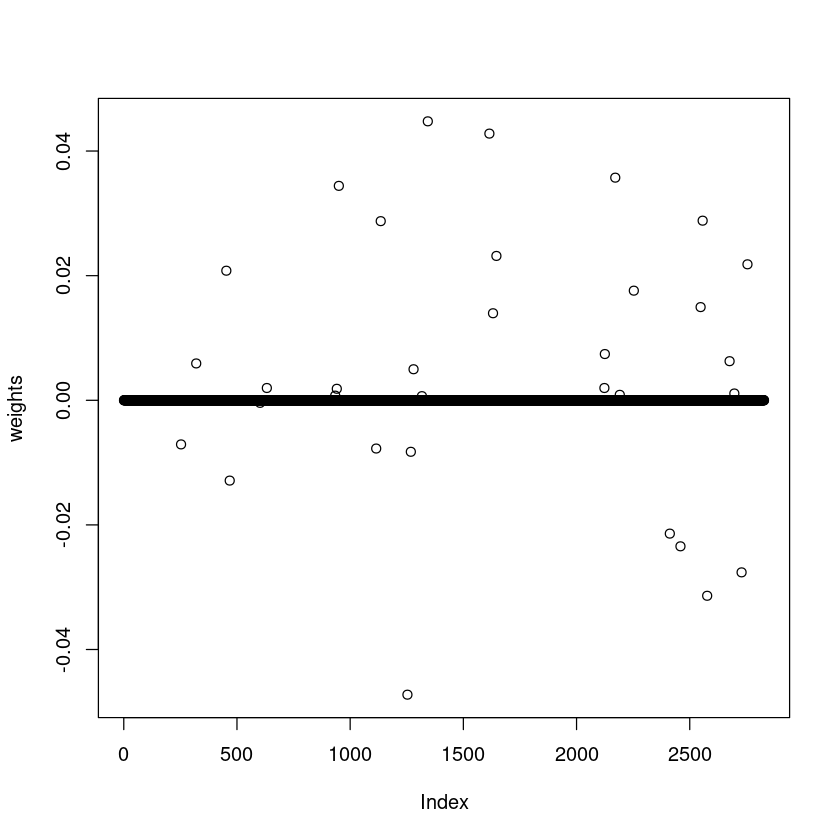

In [26]:
plot(weights)

Use varbvs,

In [27]:
library(varbvs)
twas_varbvs = function(X,y,z,R=NULL) {
    if (is.null(R)) R = cor(X)
    weights = varbvs(X,Z=NULL,y,logodds = seq(-3,-1,0.1),verbose=F)$beta
    print(cor(X%*%weights, y)^2)
    twas_z(weights, z, R)
}

twas_varbvs(eqtl$X,eqtl$y_res, gwas$Z, R=R)

          [,1]
[1,] 0.1359204


-2.406905
0.01608834


Use mr.ash

In [42]:
lasso.weights = glmnet_weights(eqtl$X, eqtl$y_res,alpha=1)
weights = mr_ash_weights(eqtl$X, eqtl$y_res, init_prior_sd=TRUE, beta.init=lasso.weights)
cor(eqtl$X%*%weights, eqtl$y_res)^2
twas_z(weights, gwas$Z, R=R)

Mr.ASH terminated at iteration 85.


0.1816391


-3.176755
0.001489329


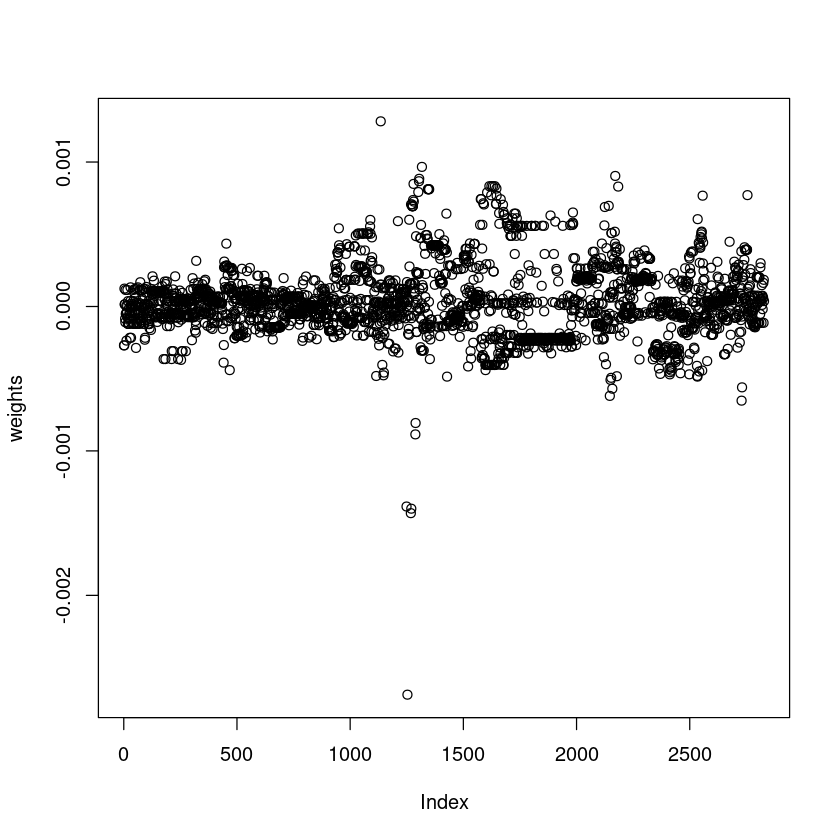

In [43]:
plot(weights)

In [44]:
weights = mr_ash_weights(eqtl$X, eqtl$y_res, init_prior_sd=FALSE, beta.init=lasso.weights)
cor(eqtl$X%*%weights, eqtl$y_res)^2
twas_z(weights, gwas$Z, R=R)

Mr.ASH terminated at iteration 50.


0.1821173


-3.383475
0.000715748


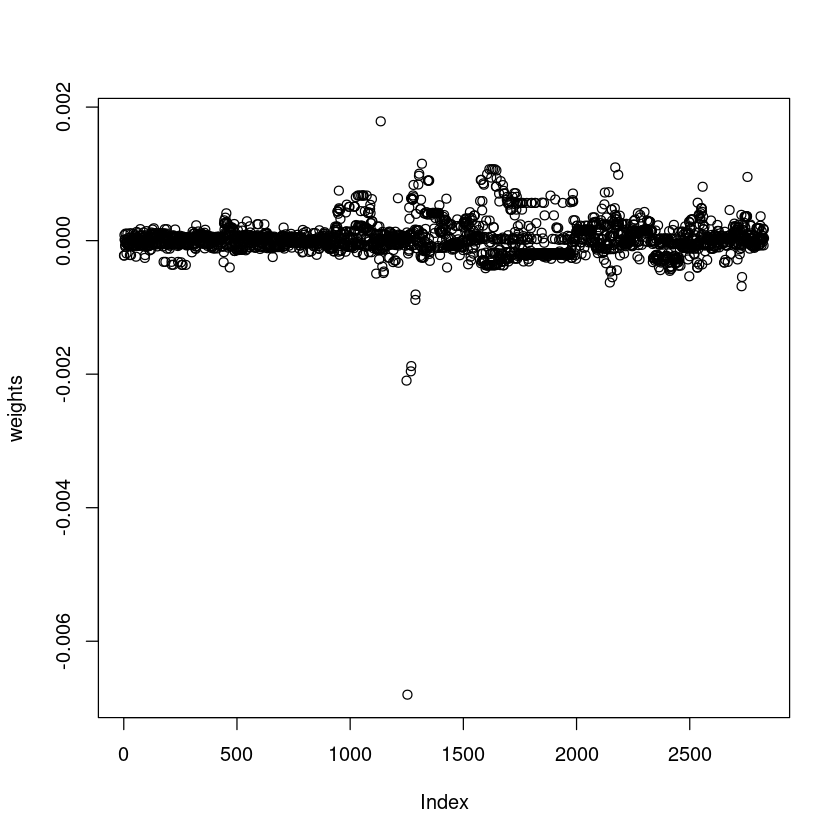

In [45]:
plot(weights)